In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.optimize import curve_fit
from matplotlib.ticker import FormatStrFormatter

Question 1.2

In [2]:
## We want to plot the cost of transport as a function of the mass of the bird and the speed.
## BASED ON PART A, let's construct a method to output the cost of transport from velocity and speed.

def cot(speed,mass):
    mass_fac = (mass/0.035)
    e = 10.7/speed*(mass_fac)**(-1/4)+2.2e-4*speed**2*(mass_fac)**(-1/3)+2.6/speed**2*(mass_fac)**(1/3)
    return e


Text(0.5, 1.0, 'Tuckers Cost of Transport Versus Velocity of Birds')

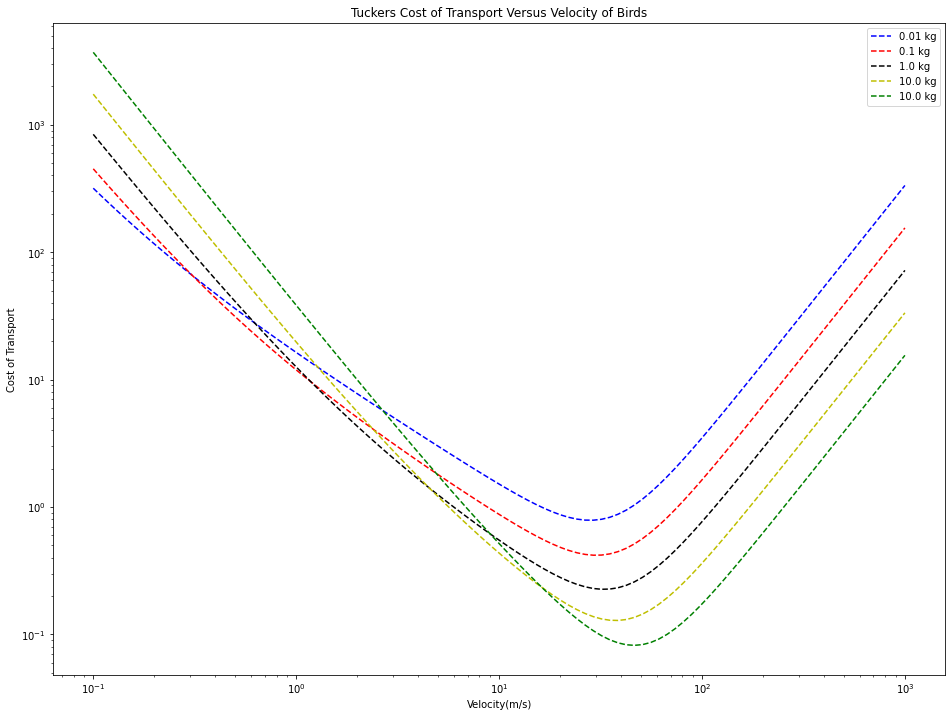

In [3]:
## now we want to form a list of velocity and mass values:
velocity = np.logspace(-1,3,100)
mass = np.array([0.01,0.1,1.0,10.0,100.0])

## Now let's run the cost of transport method for the relevant mass.
case1 = cot(velocity,mass[0])
case2 = cot(velocity,mass[1])
case3 = cot(velocity,mass[2])
case4 = cot(velocity,mass[3])
case5 = cot(velocity,mass[4])

## Now let's plot the indivual curves of the different bird masses 
plt.figure(figsize=(16,12))
plt.plot(velocity,case1,color='b',label='0.01 kg',linestyle='dashed')
plt.plot(velocity,case2,color='r',label='0.1 kg',linestyle='dashed')
plt.plot(velocity,case3,color='k',label='1.0 kg',linestyle='dashed')
plt.plot(velocity,case4,color='y',label='10.0 kg',linestyle='dashed')
plt.plot(velocity,case5,color='g',label='10.0 kg',linestyle='dashed')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel('Velocity(m/s)')
plt.ylabel('Cost of Transport')
plt.title('Tuckers Cost of Transport Versus Velocity of Birds')





Question 1.3

In [4]:
## Now we want to solve for the flying speed which minimizes the cost of transport for each mass
## To do this we want to find the minimum value of the cost of transport for plotted curves above and print the velocity values

## Idea:
cot_min_1 = case1[np.argmin(case1)]
print('The minimum cost of transport for 0.01 kg:',cot_min_1)
v_min_1 = velocity[np.argmin(case1)]
print('The corresponding velocity:',v_min_1,'m/s')

## Now we can repeat this for the remaining cases:
cot_min_2 = case2[np.argmin(case2)]
print('\nThe minimum cost of transport for 0.1 kg:',cot_min_2)
v_min_2 = velocity[np.argmin(case2)]
print('The corresponding velocity:',v_min_2,'m/s')

cot_min_3 = case3[np.argmin(case3)]
print('\nThe minimum cost of transport for 1.0 kg:',cot_min_3)
v_min_3 = velocity[np.argmin(case3)]
print('The corresponding velocity:',v_min_3,'m/s')

cot_min_4 = case4[np.argmin(case4)]
print('\nThe minimum cost of transport for 10.0 kg:',cot_min_4)
v_min_4 = velocity[np.argmin(case4)]
print('The corresponding velocity:',v_min_4,'m/s')

cot_min_5 = case5[np.argmin(case5)]
print('\nThe minimum cost of transport for 100.0 kg:',cot_min_5)
v_min_5 = velocity[np.argmin(case5)]
print('The corresponding velocity:',v_min_5,'m/s')

## Here are the resulting values:



The minimum cost of transport for 0.01 kg: 0.787912439253271
The corresponding velocity: 29.150530628251786 m/s

The minimum cost of transport for 0.1 kg: 0.4184161802727962
The corresponding velocity: 29.150530628251786 m/s

The minimum cost of transport for 1.0 kg: 0.22608318233326513
The corresponding velocity: 31.992671377973846 m/s

The minimum cost of transport for 10.0 kg: 0.12867057003277443
The corresponding velocity: 38.535285937105314 m/s

The minimum cost of transport for 100.0 kg: 0.08205769334922539
The corresponding velocity: 46.41588833612782 m/s


In [5]:
## Now let's preform a power law fit between the mass and the minimum cost of transport
## To do this I will need to utilize the numpy curve fit method

## Define what the curve needs to fit i.e the power law where const*mass**(exp)

def power(mass,const,exp):
    val = const*(mass**exp)
    return val


In [6]:
## Since we have defined the power law, lets run the mass values and the minimum cost of transport values in the curve_fit method

cot_min_all = np.array([cot_min_1,cot_min_2,cot_min_3,cot_min_4,cot_min_5])
print(cot_min_all)

[0.78791244 0.41841618 0.22608318 0.12867057 0.08205769]


In [9]:
a, cov = curve_fit(power, mass, cot_min_all)
print('The value obtained for exponent is: ',a[1])
print('The value obtained for constant is: ',a[0])

The value obtained for exponent is:  -0.26570752336279263
The value obtained for constant is:  0.23076628833721421


In [14]:
np.sqrt(np.diag(cov))[1]

0.006331141978413545

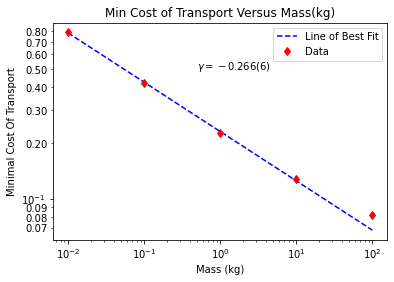

In [22]:
## Since we have now obtained the relevant best fit values.
mass_space = np.logspace(-2,2,100)
curve_fit_results = power(mass_space,a[0],a[1])
plt.plot(mass_space,curve_fit_results,color='b',linestyle='dashed',label='Line of Best Fit')
plt.plot(mass,cot_min_all,'rd',label='Data')
plt.xscale('log')
plt.yscale('log')
ax = plt.gca()
ax.set_yscale('log')
plt.tick_params(axis='y',which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
plt.text(0.5, 0.5, r'$\gamma = -0.266(6)$')
plt.xlabel('Mass (kg)')
plt.ylabel('Minimal Cost Of Transport')
plt.title('Min Cost of Transport Versus Mass(kg)')
plt.legend()